# Analysis of Indian Rainfall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from numpy import median
%matplotlib inline



# Indian Rainfall Exploratory Analysis

In [2]:
district_wise_rainfall = pd.read_csv("district wise rainfall normal.csv")
district_wise_rainfall.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [3]:
india_rainfall = pd.read_csv("rainfall in india 1901-2015.csv").fillna(0)
india_rainfall.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## minimum, maximum, mean rainfall

In [4]:
district_wise_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [5]:
district_wise_rainfall.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [6]:
india_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

In [7]:
india_rainfall.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.938897,21.789431,27.319315,43.085520,85.682920,229.954762,346.623834,289.981414,197.074223,95.344582,39.759621,18.824733,1402.095821,40.688387,155.560860,1062.137974,153.613776
std,33.140898,33.574242,35.901220,46.936787,67.811512,123.211711,234.705204,269.690148,188.895403,135.518992,99.512313,68.624424,42.328296,907.896986,59.285415,201.228532,708.822281,166.902936
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.000000,174.800000,155.650000,100.400000,14.500000,0.600000,0.100000,795.075000,4.100000,23.800000,571.825000,33.500000
50%,1958.000000,6.000000,6.700000,7.800000,15.600000,36.400000,138.650000,284.400000,259.250000,173.700000,64.900000,9.500000,3.000000,1118.650000,19.100000,74.450000,880.250000,97.400000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.500000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


## What is the annual rainfall in each state

In [8]:
subdivision = india_rainfall['SUBDIVISION'].unique()
subdivision


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [9]:
states = district_wise_rainfall['STATE_UT_NAME'].unique()
states

array(['ANDAMAN And NICOBAR ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'MEGHALAYA', 'MANIPUR', 'MIZORAM', 'NAGALAND', 'TRIPURA',
       'WEST BENGAL', 'SIKKIM', 'ORISSA', 'JHARKHAND', 'BIHAR',
       'UTTAR PRADESH', 'UTTARANCHAL', 'HARYANA', 'CHANDIGARH', 'DELHI',
       'PUNJAB', 'HIMACHAL', 'JAMMU AND KASHMIR', 'RAJASTHAN',
       'MADHYA PRADESH', 'GUJARAT', 'DADAR NAGAR HAVELI', 'DAMAN AND DUI',
       'MAHARASHTRA', 'GOA', 'CHATISGARH', 'ANDHRA PRADESH', 'TAMIL NADU',
       'PONDICHERRY', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

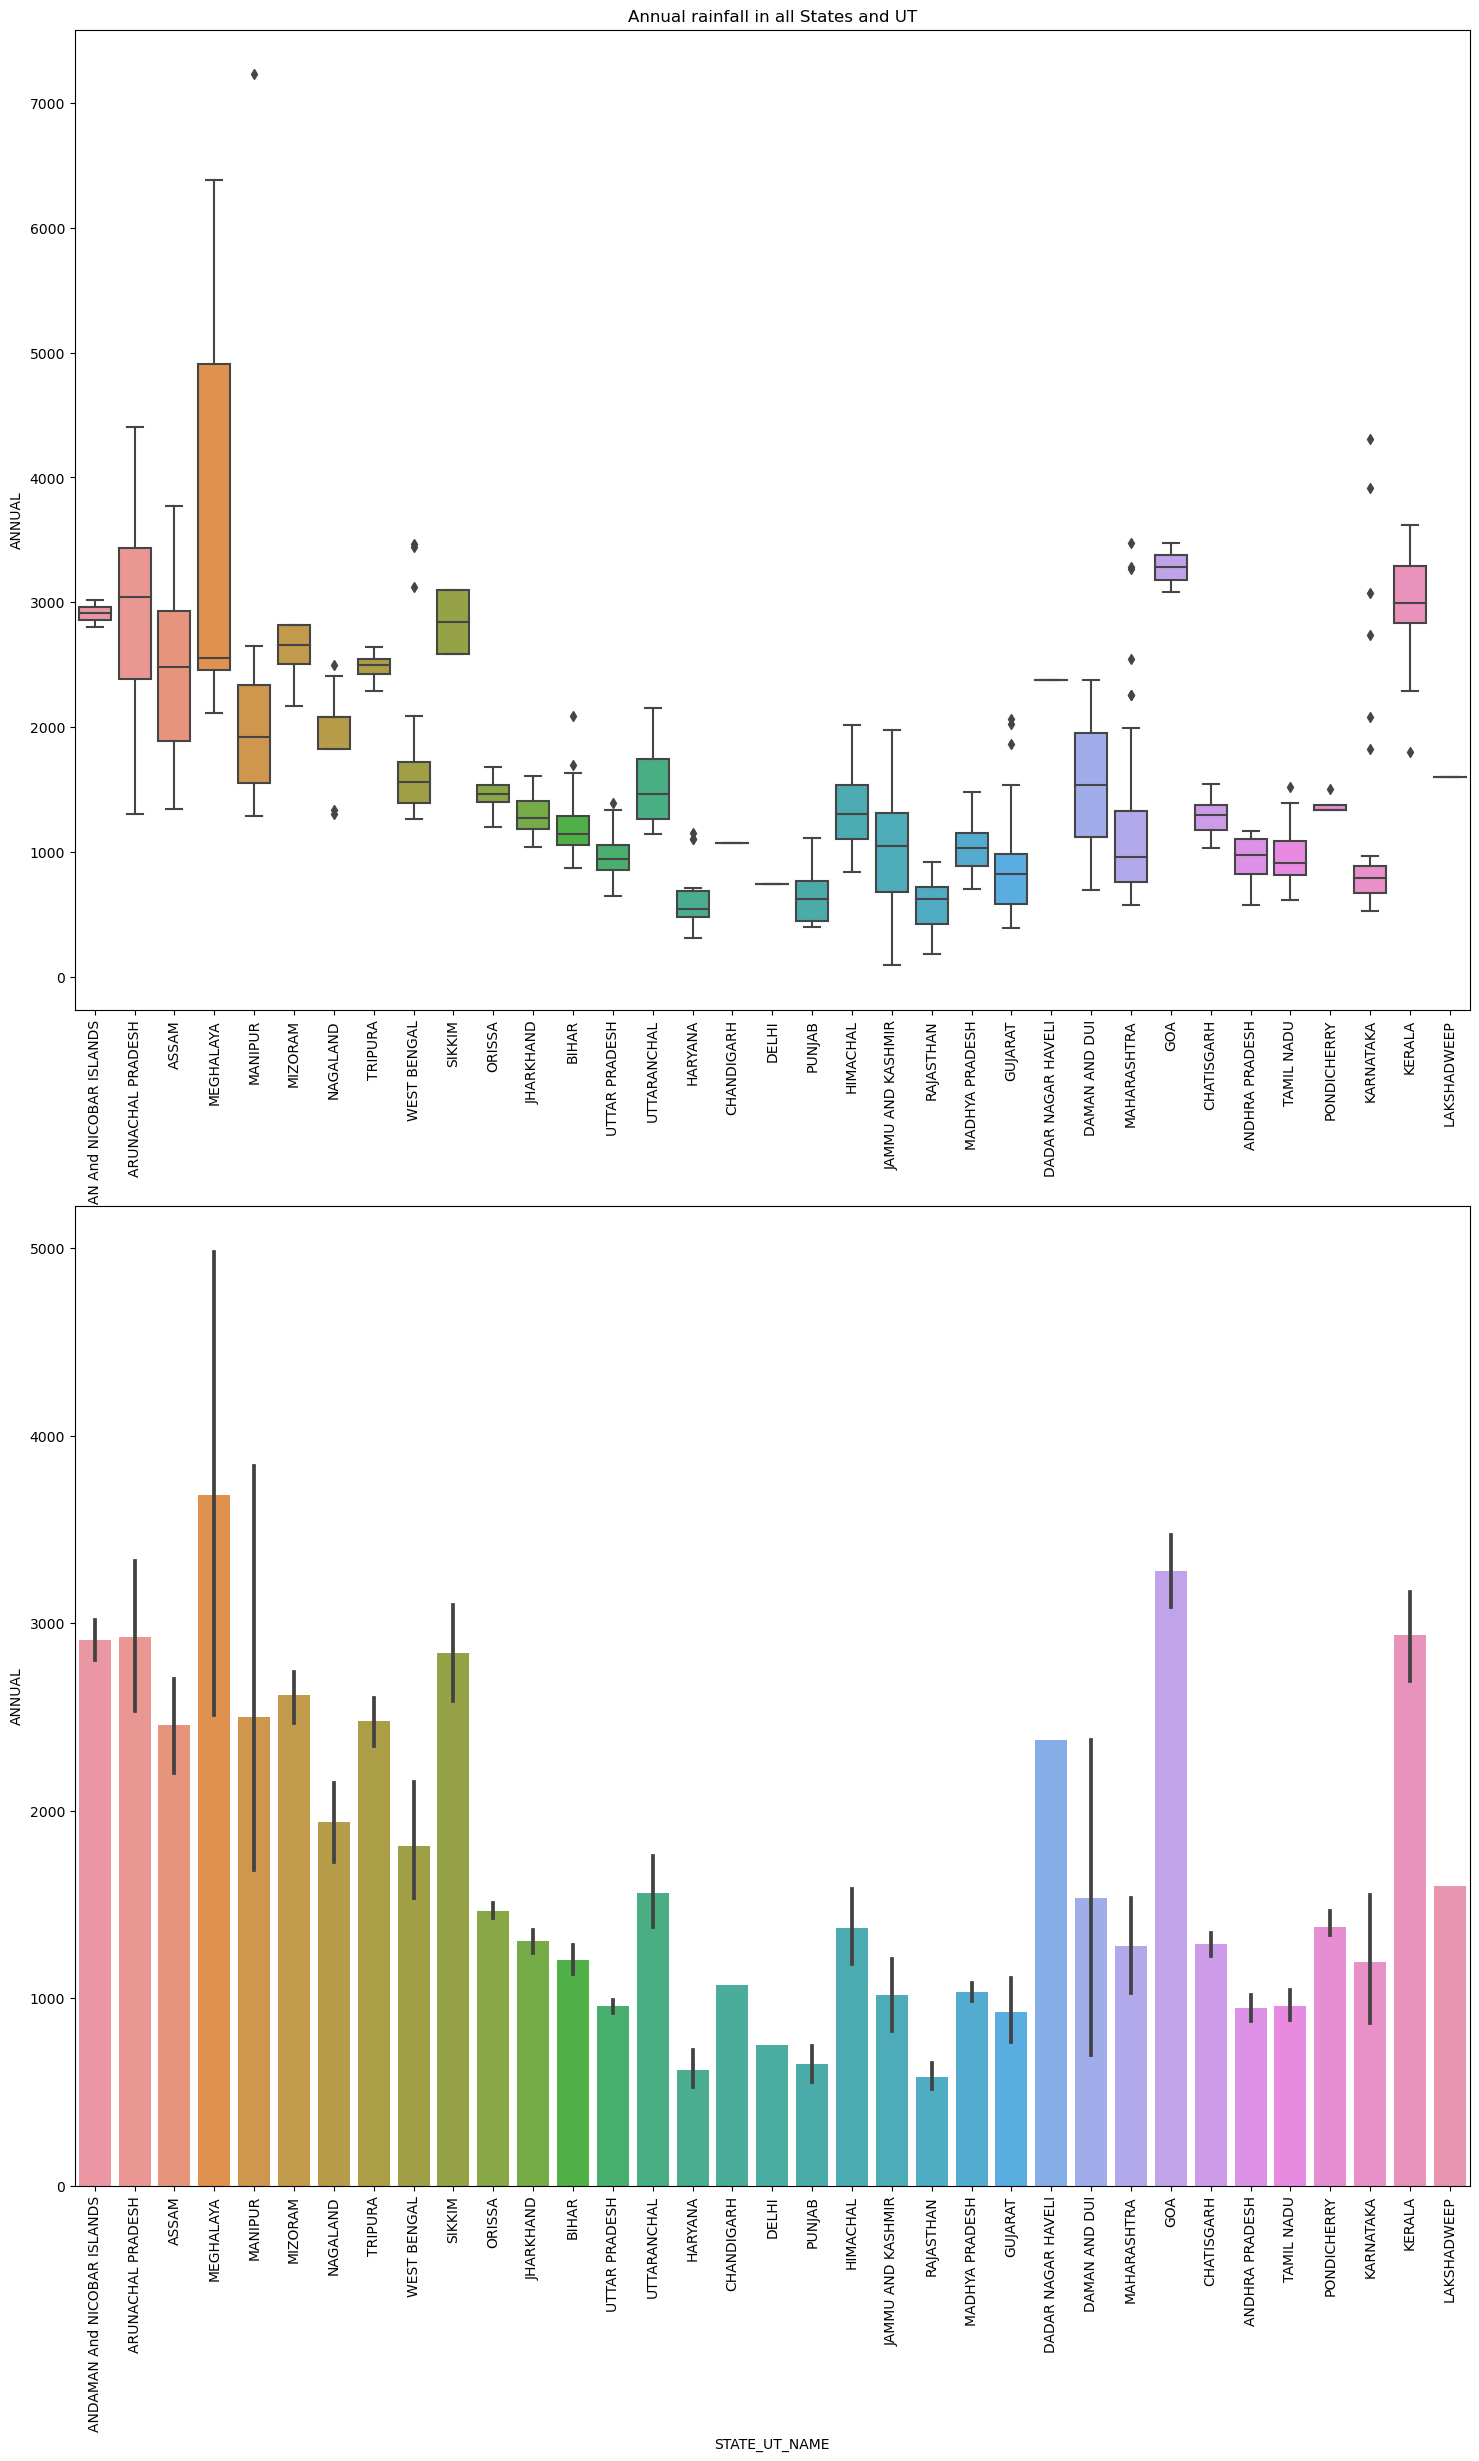

In [10]:
fig = plt.figure(figsize=(18, 28))
ax = plt.subplot(2,1,1)
ax = plt.xticks(rotation=90)
ax = sns.boxplot(x='STATE_UT_NAME', y='ANNUAL', data=district_wise_rainfall)
ax = plt.title('Annual rainfall in all States and UT')

ax = plt.subplot(2,1,2)
ax = plt.xticks(rotation=90)
ax = sns.barplot(x='STATE_UT_NAME', y='ANNUAL', data=district_wise_rainfall)
plt.savefig("statewise.png")

## Rainfall distribution monthly and seasonal, over the years in all states
### Places with highest and lowest rainfalls

In [11]:
total_rainfall_in_states = district_wise_rainfall.groupby(['STATE_UT_NAME']).sum()
total_rainfall_in_states['STATE_UT_NAME'] = total_rainfall_in_states.index
total_rainfall_in_states.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,STATE_UT_NAME
STATE_UT_NAME,,,,,,,,,,,,,,,,,,
ANDAMAN And NICOBAR ISLANDS,183.7,99.8,92.4,260.9,1076.5,1256.0,1171.7,1155.9,1265.2,903.3,789.6,479.2,8734.2,283.5,1429.8,4848.8,2172.1,ANDAMAN And NICOBAR ISLANDS
ANDHRA PRADESH,145.4,169.1,232.2,457.1,1121.6,2630.5,4263.4,4126.8,3688.6,3187.8,1356.2,358.0,21736.7,314.5,1810.9,14709.3,4902.0,ANDHRA PRADESH
ARUNACHAL PRADESH,859.0,1492.7,2640.3,4402.6,4804.2,7862.1,8761.3,6057.6,5863.6,2828.3,691.0,575.3,46838.0,2351.7,11847.1,28544.6,4094.6,ARUNACHAL PRADESH
ASSAM,424.8,856.3,2099.6,4894.2,9014.5,12560.0,13360.8,10189.0,8202.6,3684.1,672.9,308.9,66267.7,1281.1,16008.3,44312.4,4665.9,ASSAM
BIHAR,499.1,352.6,375.2,640.9,1963.6,6413.7,12951.8,11000.3,8488.4,2460.4,255.2,219.9,45621.1,851.7,2979.7,38854.2,2935.5,BIHAR


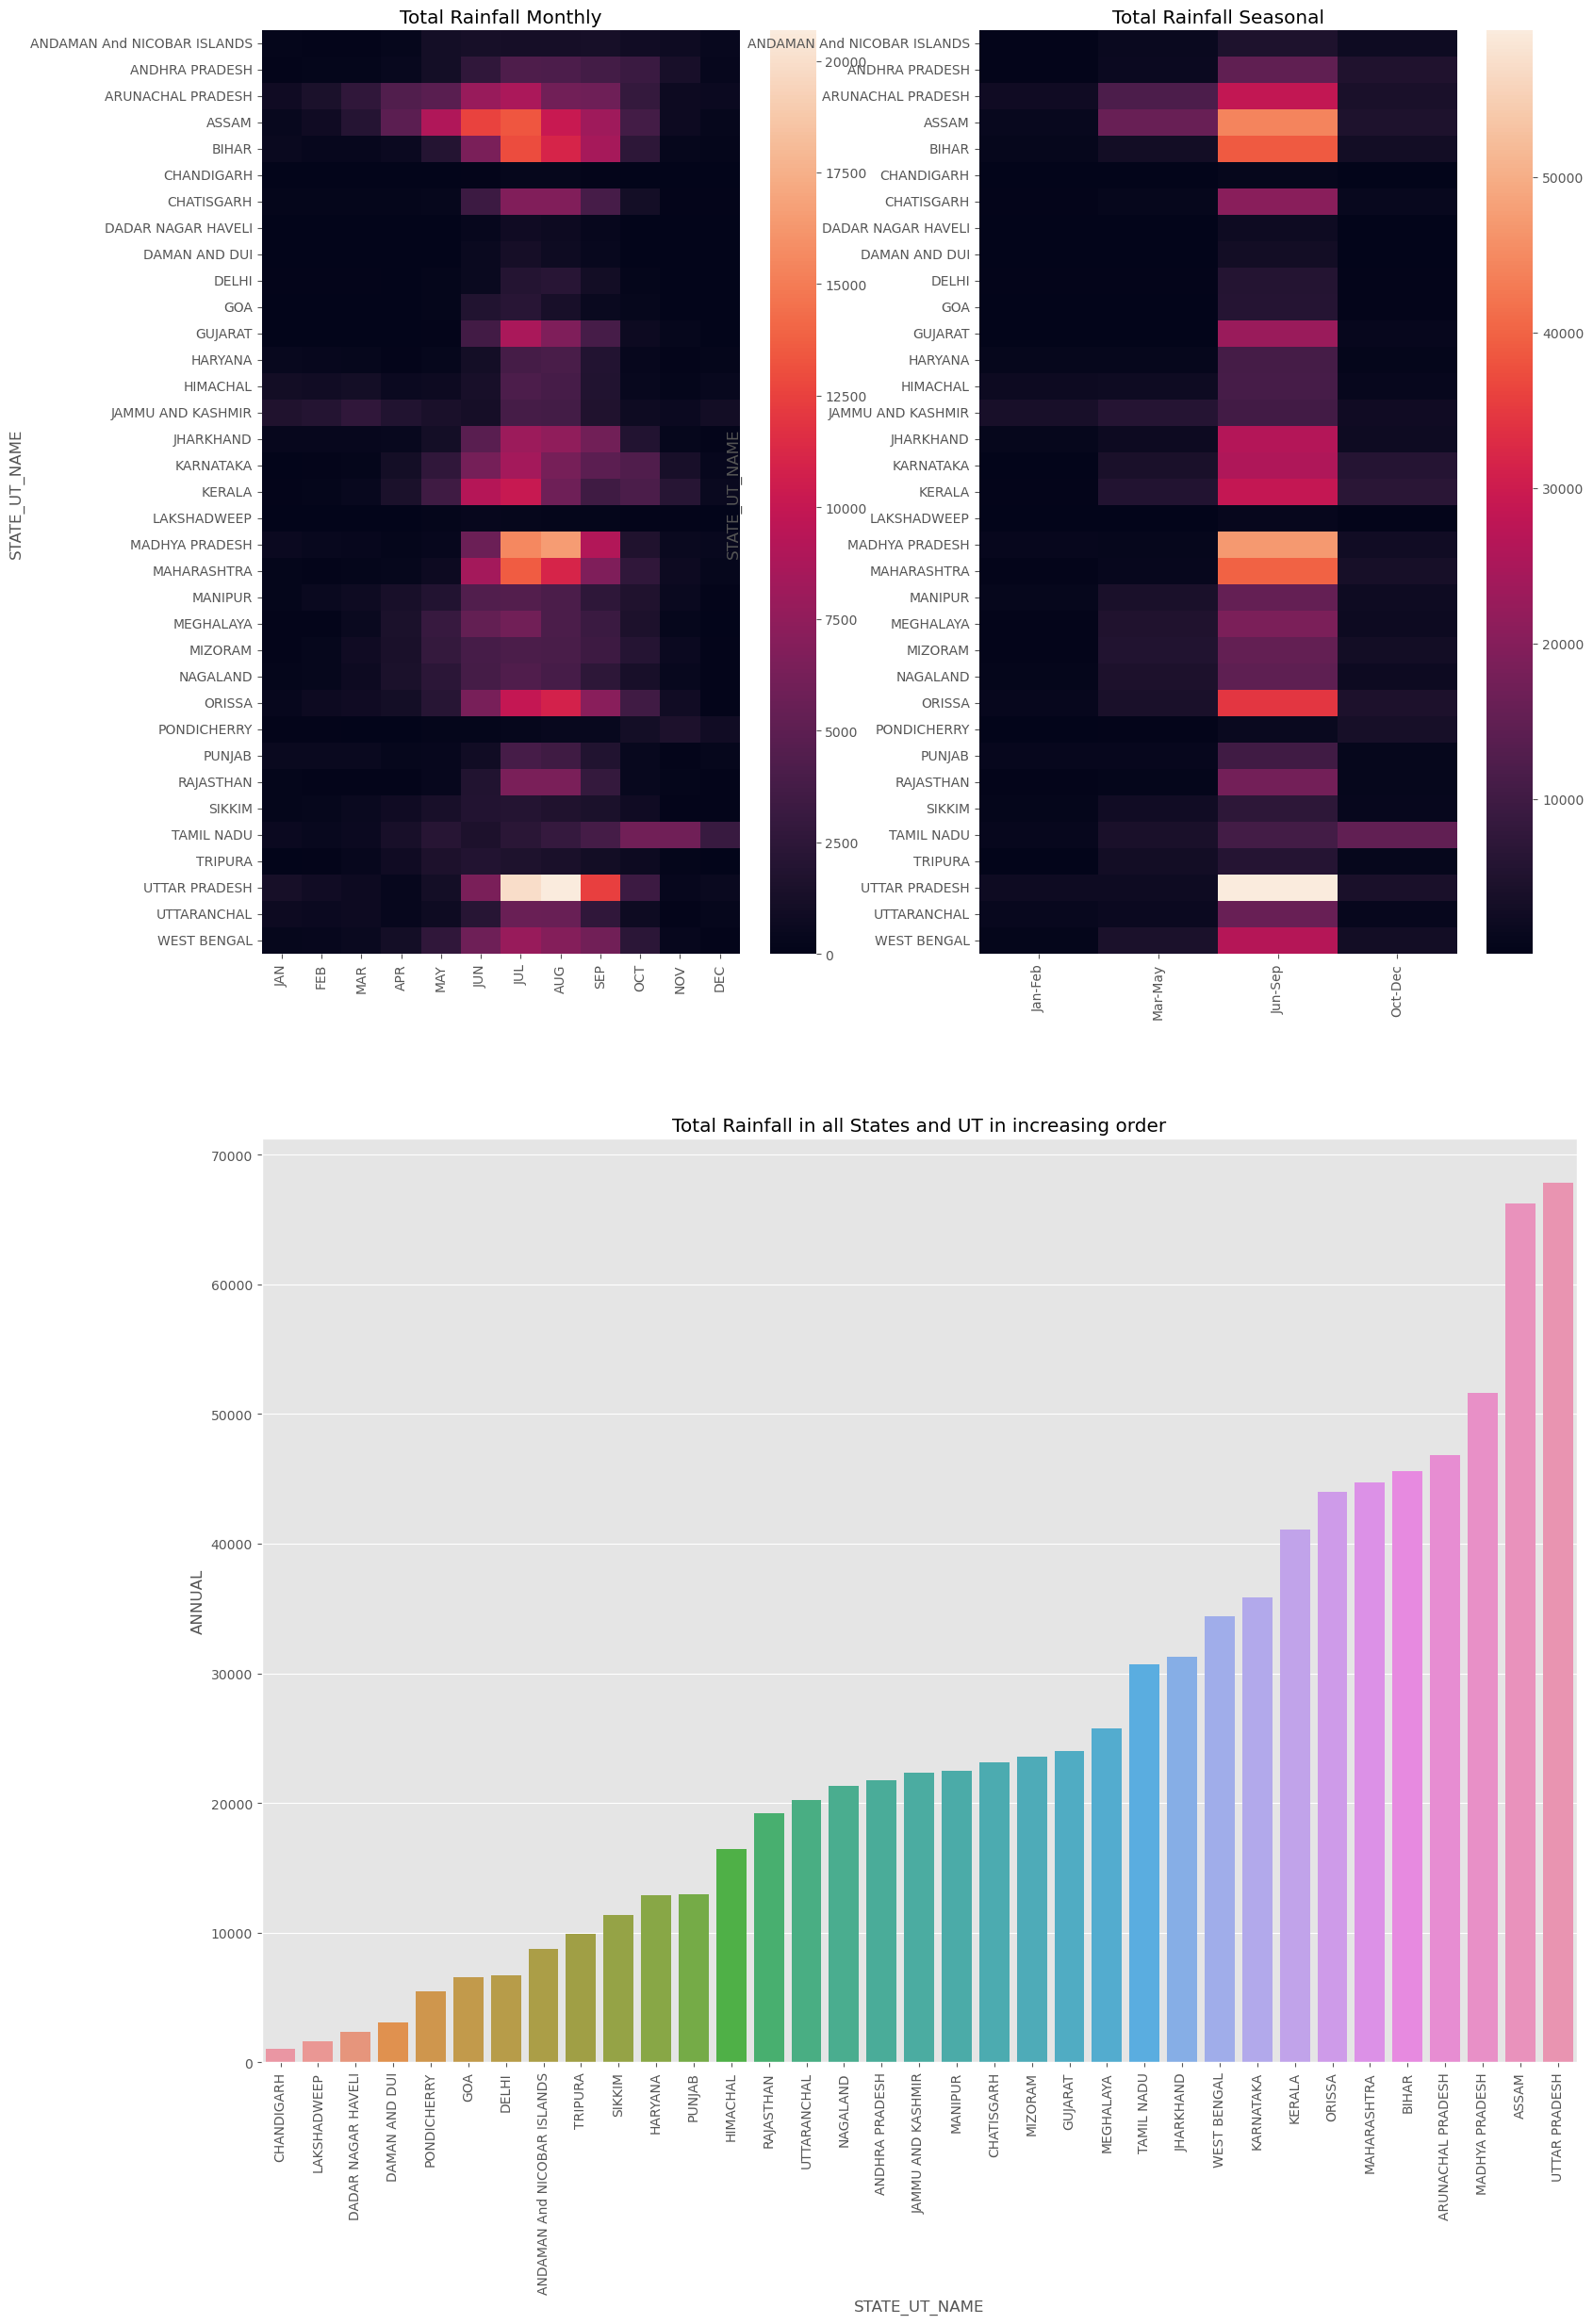

In [12]:
plt.style.use('ggplot')
index = total_rainfall_in_states.index
fig = plt.figure(figsize=(18, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=90)
ax1 = sns.heatmap(total_rainfall_in_states[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']])
ax1 = plt.title('Total Rainfall Monthly')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=90)
ax2 = sns.heatmap(total_rainfall_in_states[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
ax2 = plt.title('Total Rainfall Seasonal')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x='STATE_UT_NAME', y='ANNUAL', data=total_rainfall_in_states.sort_values('ANNUAL'))
ax3 = plt.title('Total Rainfall in all States and UT in increasing order')
plt.savefig("state_wise_rainfall.png")


As you can see in the plots, June to September is the period with highest rainfalls almost every year. This is expected, since India is a monsoon country and those months are the rainy season. Second plot shows Chandigarh and Lakshwadeep has got the least rainfall, while Assam and Uttar Pradesh are the places with highest rainfall.

## Yearly rainfall  trend in whole country

In [13]:
yearly_rainfall = india_rainfall.groupby(['YEAR']).sum()
yearly_rainfall['rise_fall'] = np.where(yearly_rainfall['ANNUAL'] > yearly_rainfall['ANNUAL'].shift(1), "Rise", "Fall")
yearly_rainfall['YEAR']= yearly_rainfall.index
yearly_rainfall.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,rise_fall,YEAR
YEAR,,,,,,,,,,,,,,,,,,,
1901,1232.7,1417.8,738.4,1623.6,2465.2,6811.3,10192.3,10546.4,4695.4,2579.4,2266.5,378.3,44947.5,2650.3,4827.2,32245.7,5224.2,Fall,1901
1902,298.2,290.7,733.3,1602.0,2521.4,5908.7,12290.1,8393.0,9051.4,3035.0,1521.0,1160.3,46805.6,588.5,4857.2,35643.5,5716.7,Rise,1902
1903,589.8,502.0,930.2,594.1,2808.3,6019.6,12673.8,10481.9,7581.7,4387.1,1649.8,758.6,47596.9,1091.9,4331.9,36756.8,6716.2,Rise,1903
1904,409.4,328.7,1010.8,1449.1,3235.9,8312.0,10919.0,7595.5,5859.1,2959.3,691.5,517.0,43287.0,737.7,5695.7,32685.6,4168.0,Fall,1904
1905,812.0,716.7,1432.9,1216.4,2675.3,5768.2,10091.0,8637.3,6274.1,2735.9,560.9,595.2,41516.2,1528.6,5324.5,30771.0,3892.2,Fall,1905


C:\Users\varun\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.8862745098039215, 0.2901960784313726, 0.2)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


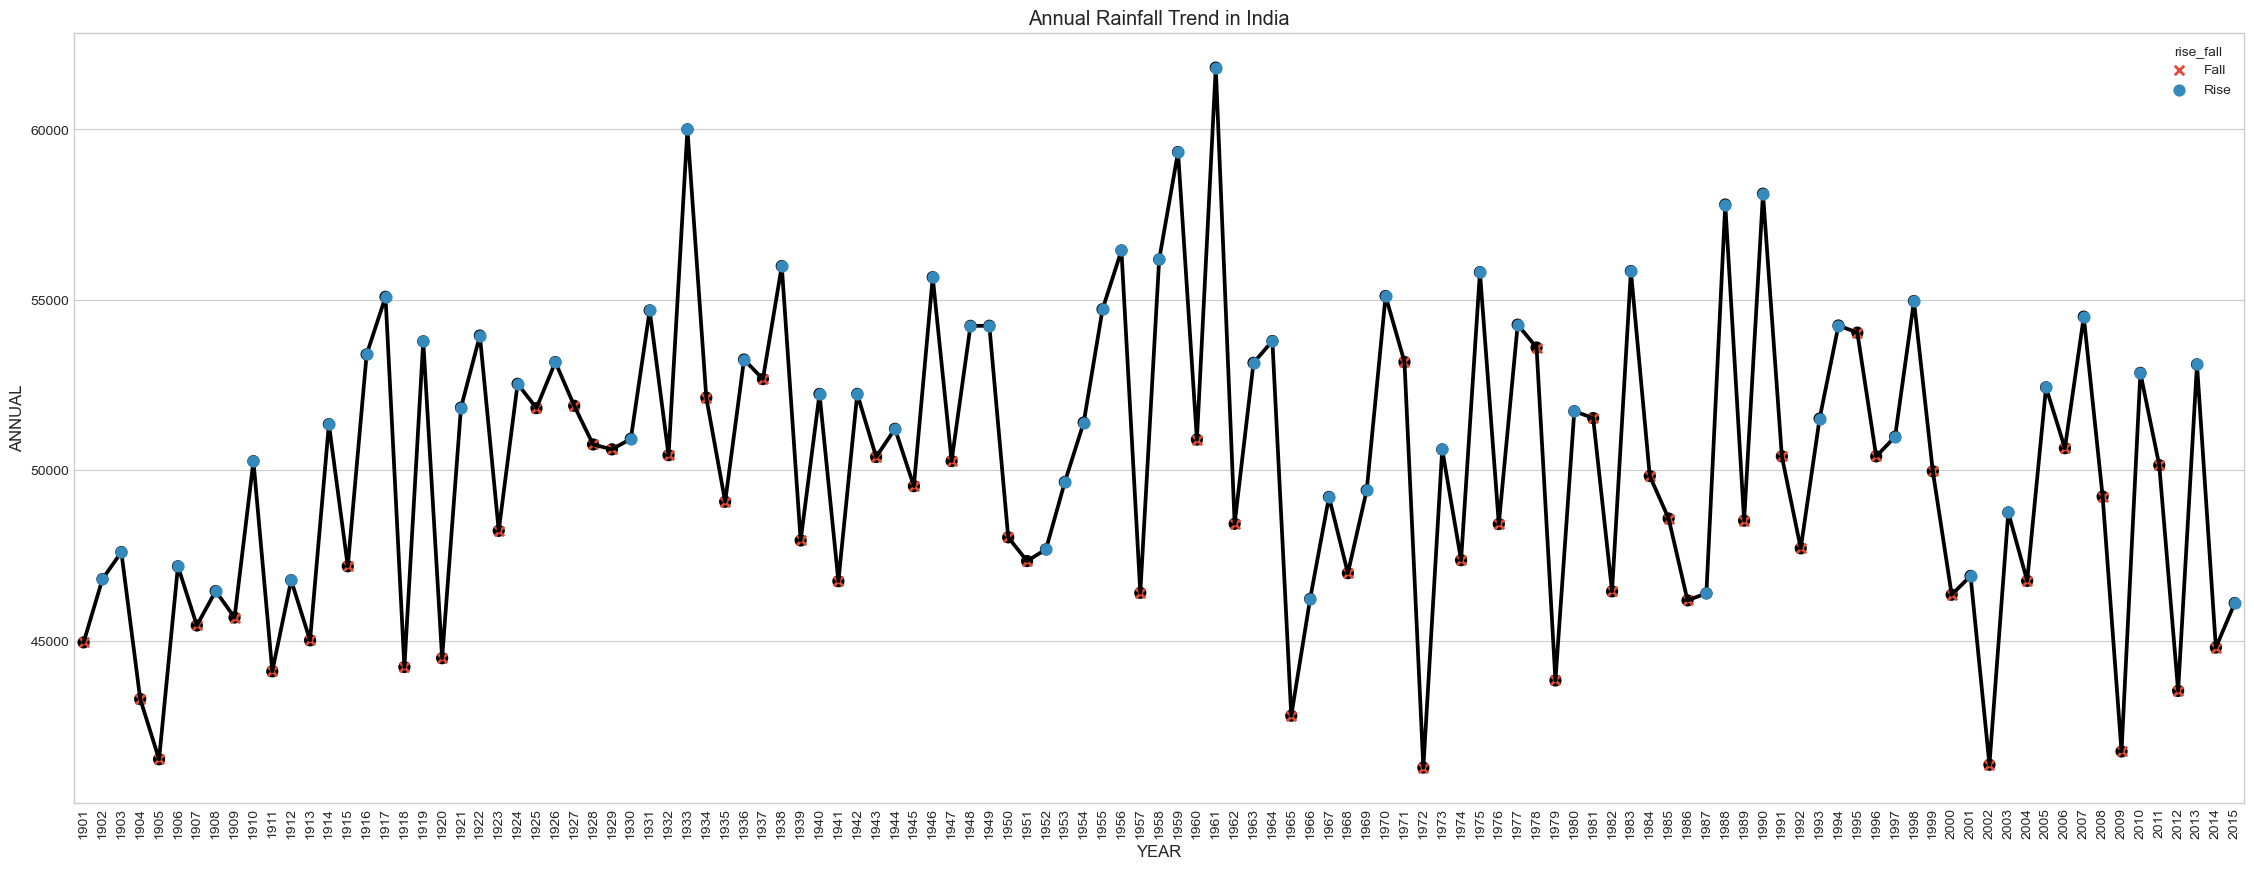

In [14]:
year = yearly_rainfall.index
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(28, 10))

ax = sns.pointplot(x=year, y="ANNUAL", data=yearly_rainfall, color='black')
ax = sns.pointplot(x=year, y="ANNUAL", data=yearly_rainfall,hue='rise_fall', markers=["x", "o"], join=False)
ax = plt.xticks(rotation=90)
ax = plt.title('Annual Rainfall Trend in India')
plt.savefig("1901 to 2015.png")

Above plot shows that rainfall keeps on fluctuating almost every year. There are sometimes certain peak periods of high rainfall and very low rainfall.

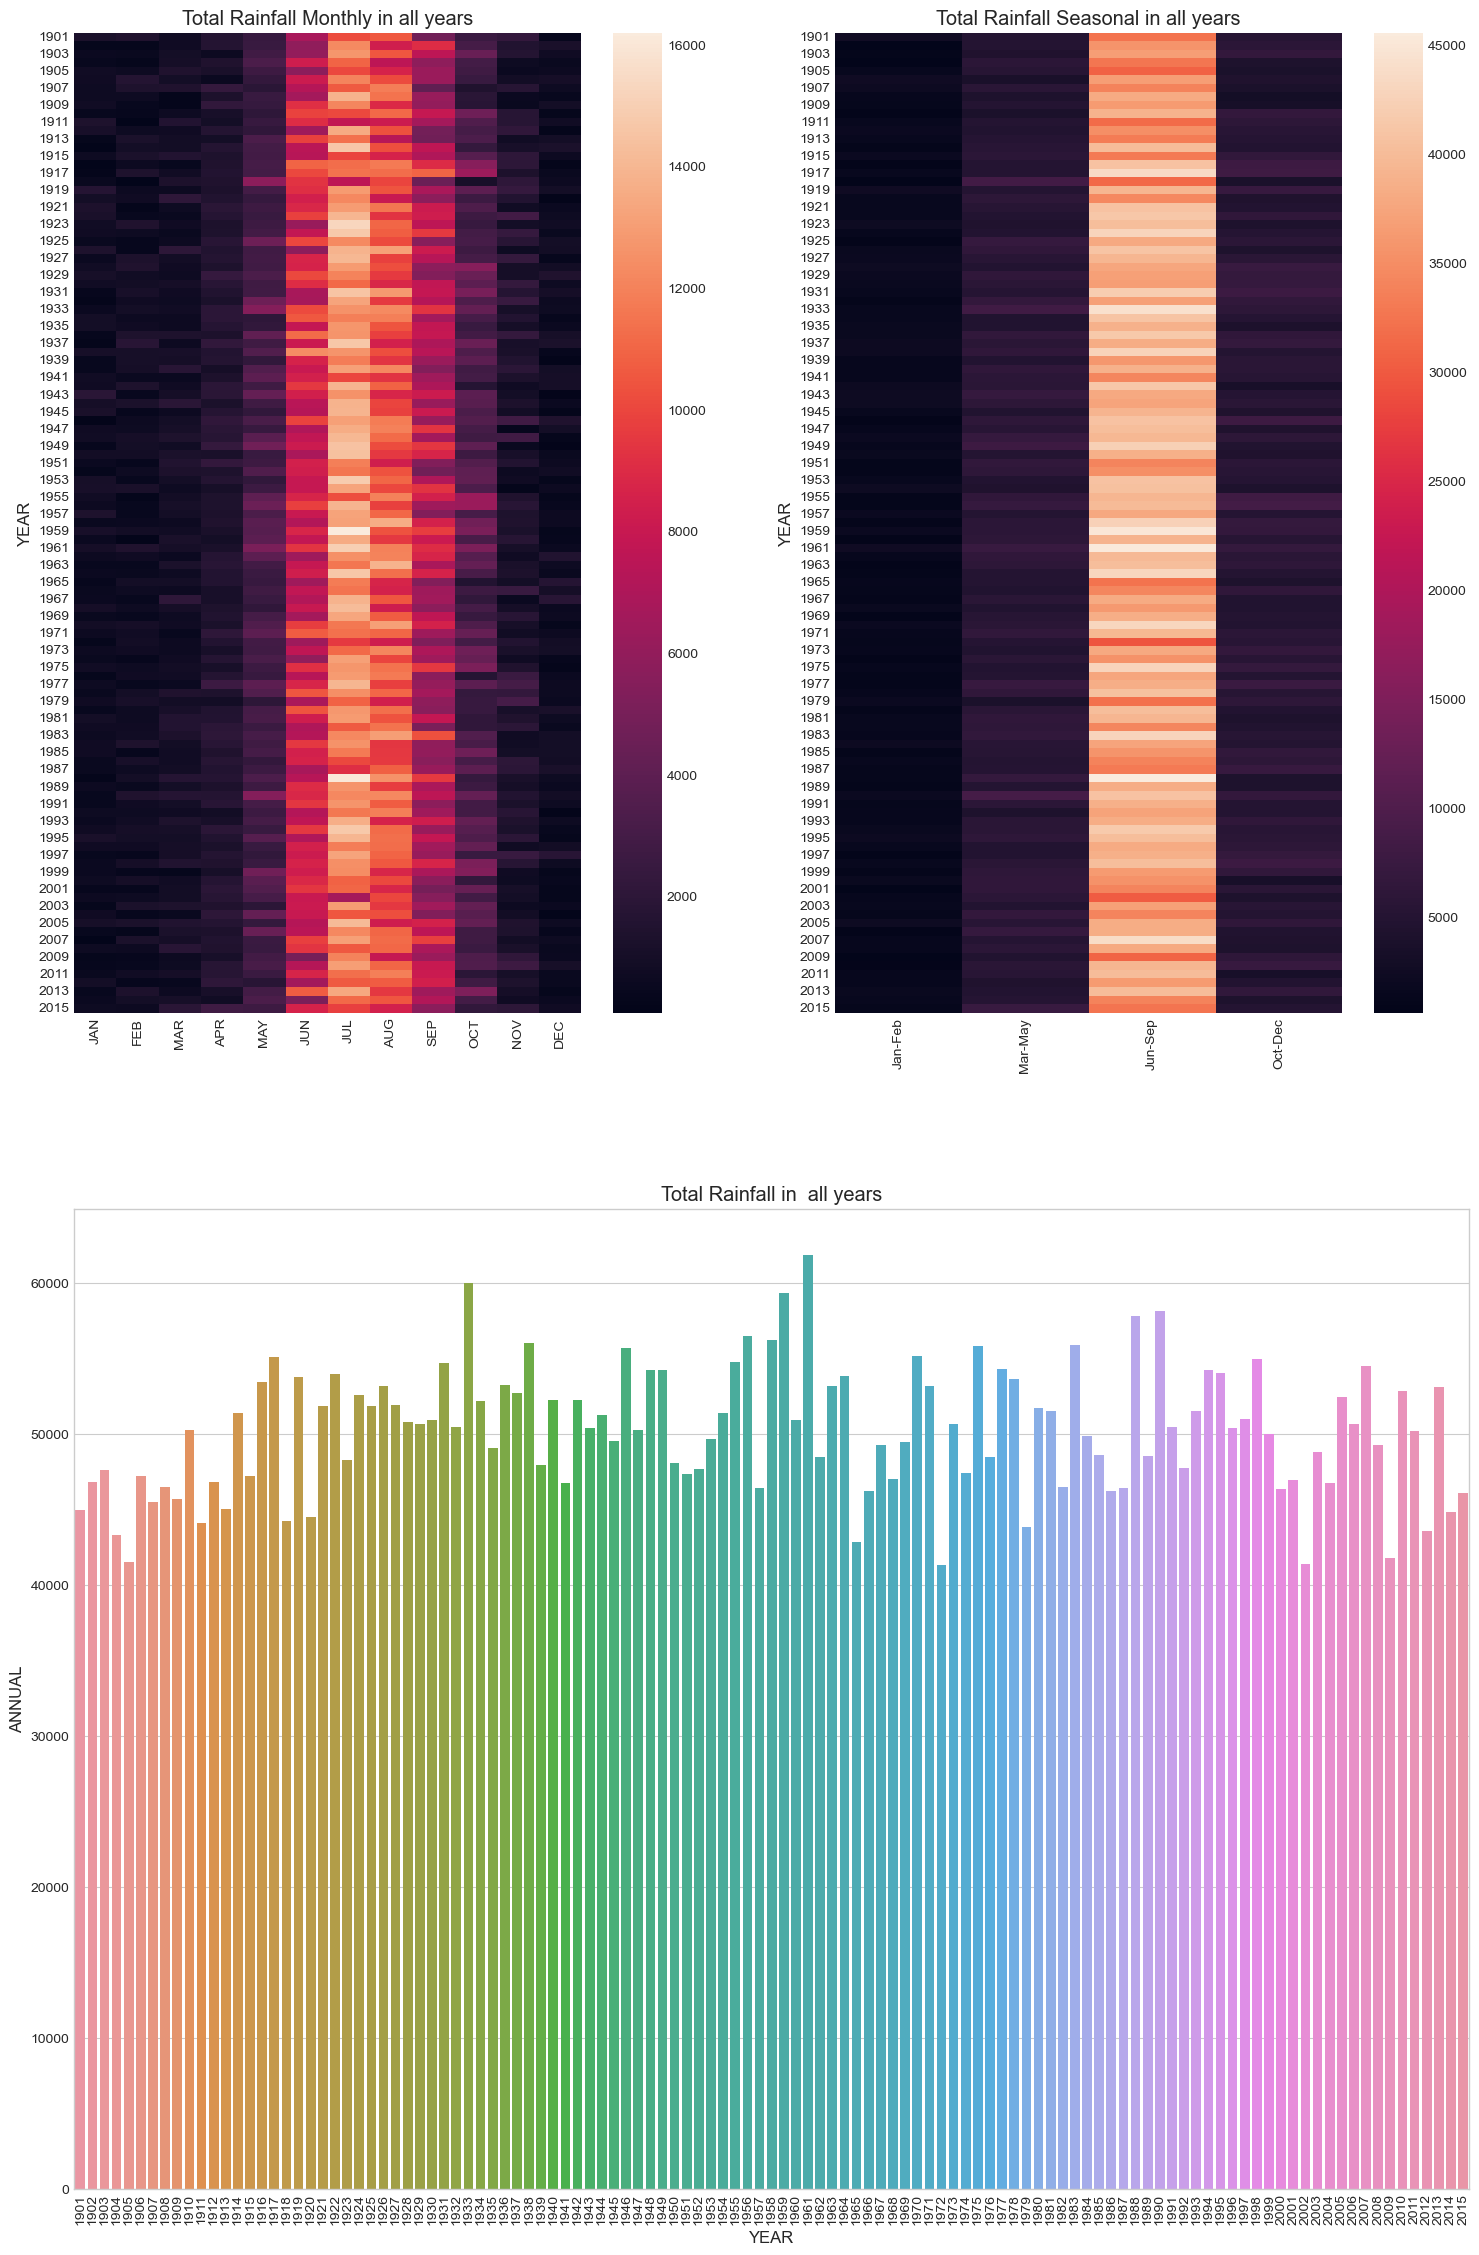

In [15]:
fig = plt.figure(figsize=(18, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=90)
ax1 = sns.heatmap(yearly_rainfall[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']])
ax1 = plt.title('Total Rainfall Monthly in all years')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=90)
ax2 = sns.heatmap(yearly_rainfall[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
ax2 = plt.title('Total Rainfall Seasonal in all years')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x='YEAR', y='ANNUAL', data=yearly_rainfall)
ax3 = plt.title('Total Rainfall in  all years')
plt.savefig("Total_rainfall_in all_years.png")

Graph show that June-September is the peak period of rainfall every year.

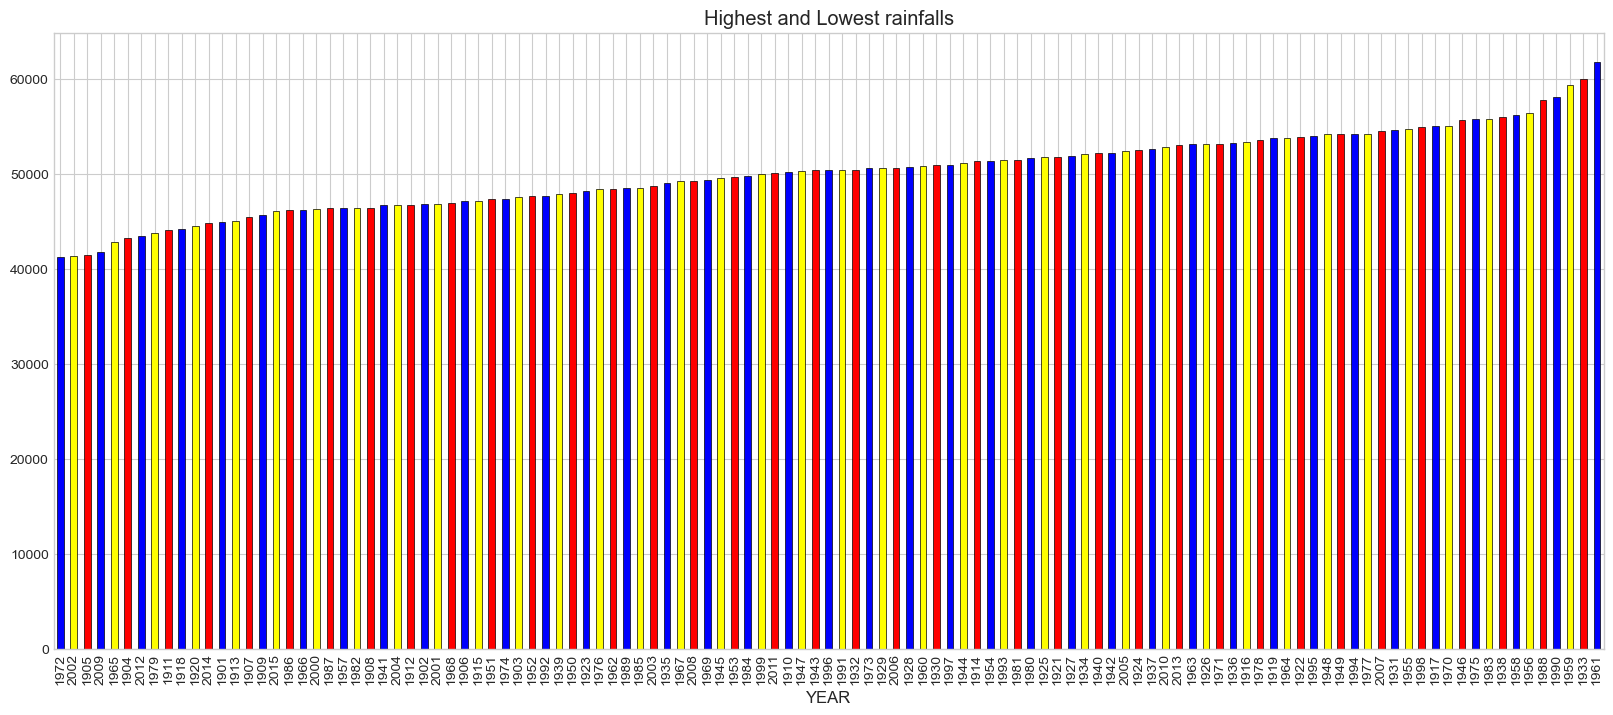

In [16]:
x1 = yearly_rainfall.sort_values('ANNUAL')
fig = plt.figure(figsize=(20, 8))
ax = plt.xticks(rotation=90)
ax = x1['ANNUAL'].plot.bar(color=['blue', 'yellow', 'red'], edgecolor = 'black')
ax = plt.title('Highest and Lowest rainfalls')
plt.savefig("highest_rain_year.png")

1972 and 2002 (least rainfall), 1933 and 1961 (highest rainfall).

## Statewise rainfall pattern for different months and seasons

In [17]:
total_rainfall_in_states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, ANDAMAN And NICOBAR ISLANDS to WEST BENGAL
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   JAN            35 non-null     float64
 1   FEB            35 non-null     float64
 2   MAR            35 non-null     float64
 3   APR            35 non-null     float64
 4   MAY            35 non-null     float64
 5   JUN            35 non-null     float64
 6   JUL            35 non-null     float64
 7   AUG            35 non-null     float64
 8   SEP            35 non-null     float64
 9   OCT            35 non-null     float64
 10  NOV            35 non-null     float64
 11  DEC            35 non-null     float64
 12  ANNUAL         35 non-null     float64
 13  Jan-Feb        35 non-null     float64
 14  Mar-May        35 non-null     float64
 15  Jun-Sep        35 non-null     float64
 16  Oct-Dec        35 non-null     float64
 17  STATE_UT_NAME  35 non-null

In [18]:
total_rainfall_in_states = total_rainfall_in_states.drop('STATE_UT_NAME', axis=1)
total_rainfall_in_states = total_rainfall_in_states.T
total_rainfall_in_states

STATE_UT_NAME,ANDAMAN And NICOBAR ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHATISGARH,DADAR NAGAR HAVELI,DAMAN AND DUI,DELHI,...,ORISSA,PONDICHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARANCHAL,WEST BENGAL
JAN,183.7,145.4,859.0,424.8,499.1,44.3,186.8,0.4,1.1,147.6,...,324.3,107.0,519.3,176.5,190.2,605.0,44.9,1220.0,648.6,285.6
FEB,99.8,169.1,1492.7,856.3,352.6,38.9,188.5,0.3,1.0,146.7,...,671.1,101.7,489.6,155.8,309.2,448.7,134.6,934.2,644.7,362.6
MAR,92.4,232.2,2640.3,2099.6,375.2,33.2,233.6,0.0,0.4,137.7,...,823.6,66.9,518.0,125.9,522.4,578.2,374.5,717.6,671.7,531.5
APR,260.9,457.1,4402.6,4894.2,640.9,14.8,236.1,0.0,0.2,80.1,...,1099.6,49.1,243.2,109.0,827.6,1363.1,883.0,377.6,387.6,1076.3
MAY,1076.5,1121.6,4804.2,9014.5,1963.6,30.1,314.7,7.4,8.3,173.7,...,2121.7,163.3,323.3,350.7,1294.2,2161.0,1566.3,1104.9,759.1,2650.3
JUN,1256.0,2630.5,7862.1,12560.0,6413.7,120.0,3250.5,385.1,553.0,538.2,...,6375.5,190.7,926.5,1785.2,1935.2,1610.3,1861.7,6444.7,2154.3,5862.1
JUL,1171.7,4263.4,8761.3,13360.8,12951.8,282.4,6757.3,884.5,1166.2,1986.3,...,9969.5,312.1,3812.2,6444.2,1996.8,2323.4,1659.9,19884.8,5626.3,7846.8
AUG,1155.9,4126.8,6057.6,10189.0,11000.3,287.5,6756.1,655.9,789.2,2209.5,...,10900.4,465.7,3448.3,6420.3,1738.4,2930.3,1425.9,20677.5,5548.2,6869.9
SEP,1265.2,3688.6,5863.6,8202.6,8488.4,154.3,3860.0,391.4,455.2,991.8,...,7150.1,479.6,1856.7,2842.8,1492.6,3722.9,1041.4,12430.3,2658.2,6041.6
OCT,903.3,3187.8,2828.3,3684.1,2460.4,31.8,1113.2,38.6,71.1,184.5,...,3481.7,1087.8,434.0,476.2,839.4,5981.7,706.6,3232.3,764.9,2363.1


Let's check out total monthly and seasonal rainfall.

In [19]:
monthly_total_rainfall = total_rainfall_in_states.head(12)
seasonal_total_rainfall = total_rainfall_in_states.tail(4)

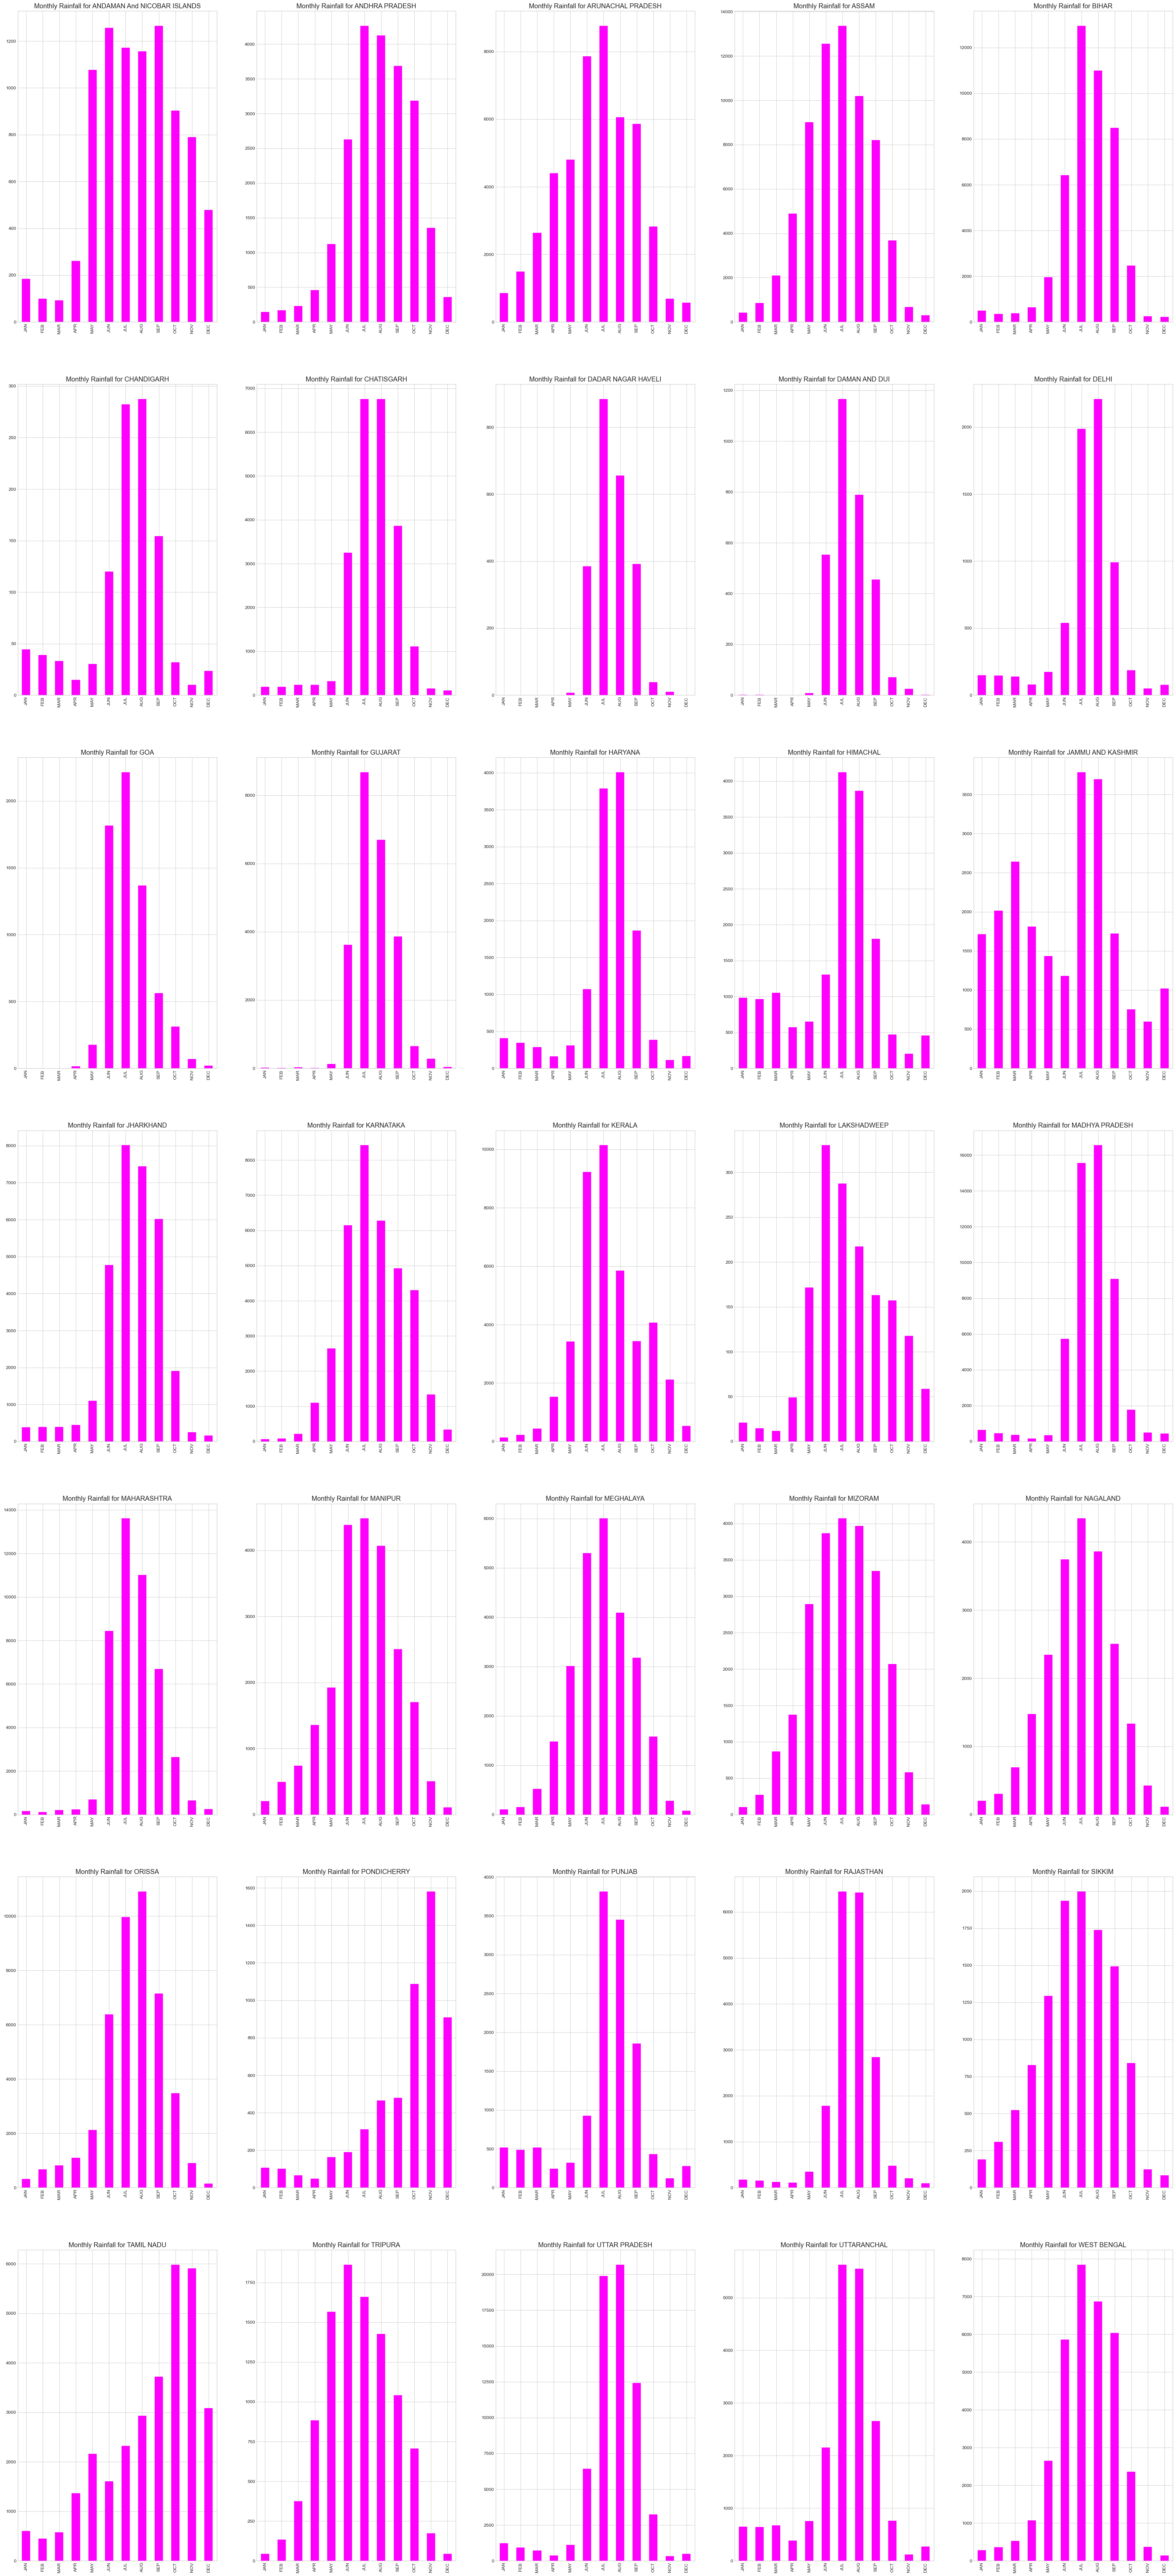

<Figure size 640x480 with 0 Axes>

In [20]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(45,100))

for i in range(35):
    plt.subplot(7, 5, i+1)
    t = monthly_total_rainfall[monthly_total_rainfall.columns[i]].plot.bar(color ='magenta')
    t.set_title("Monthly Rainfall for " + str(monthly_total_rainfall.columns[i]))
plt.show()
plt.savefig("mounthly_trend.pdf")

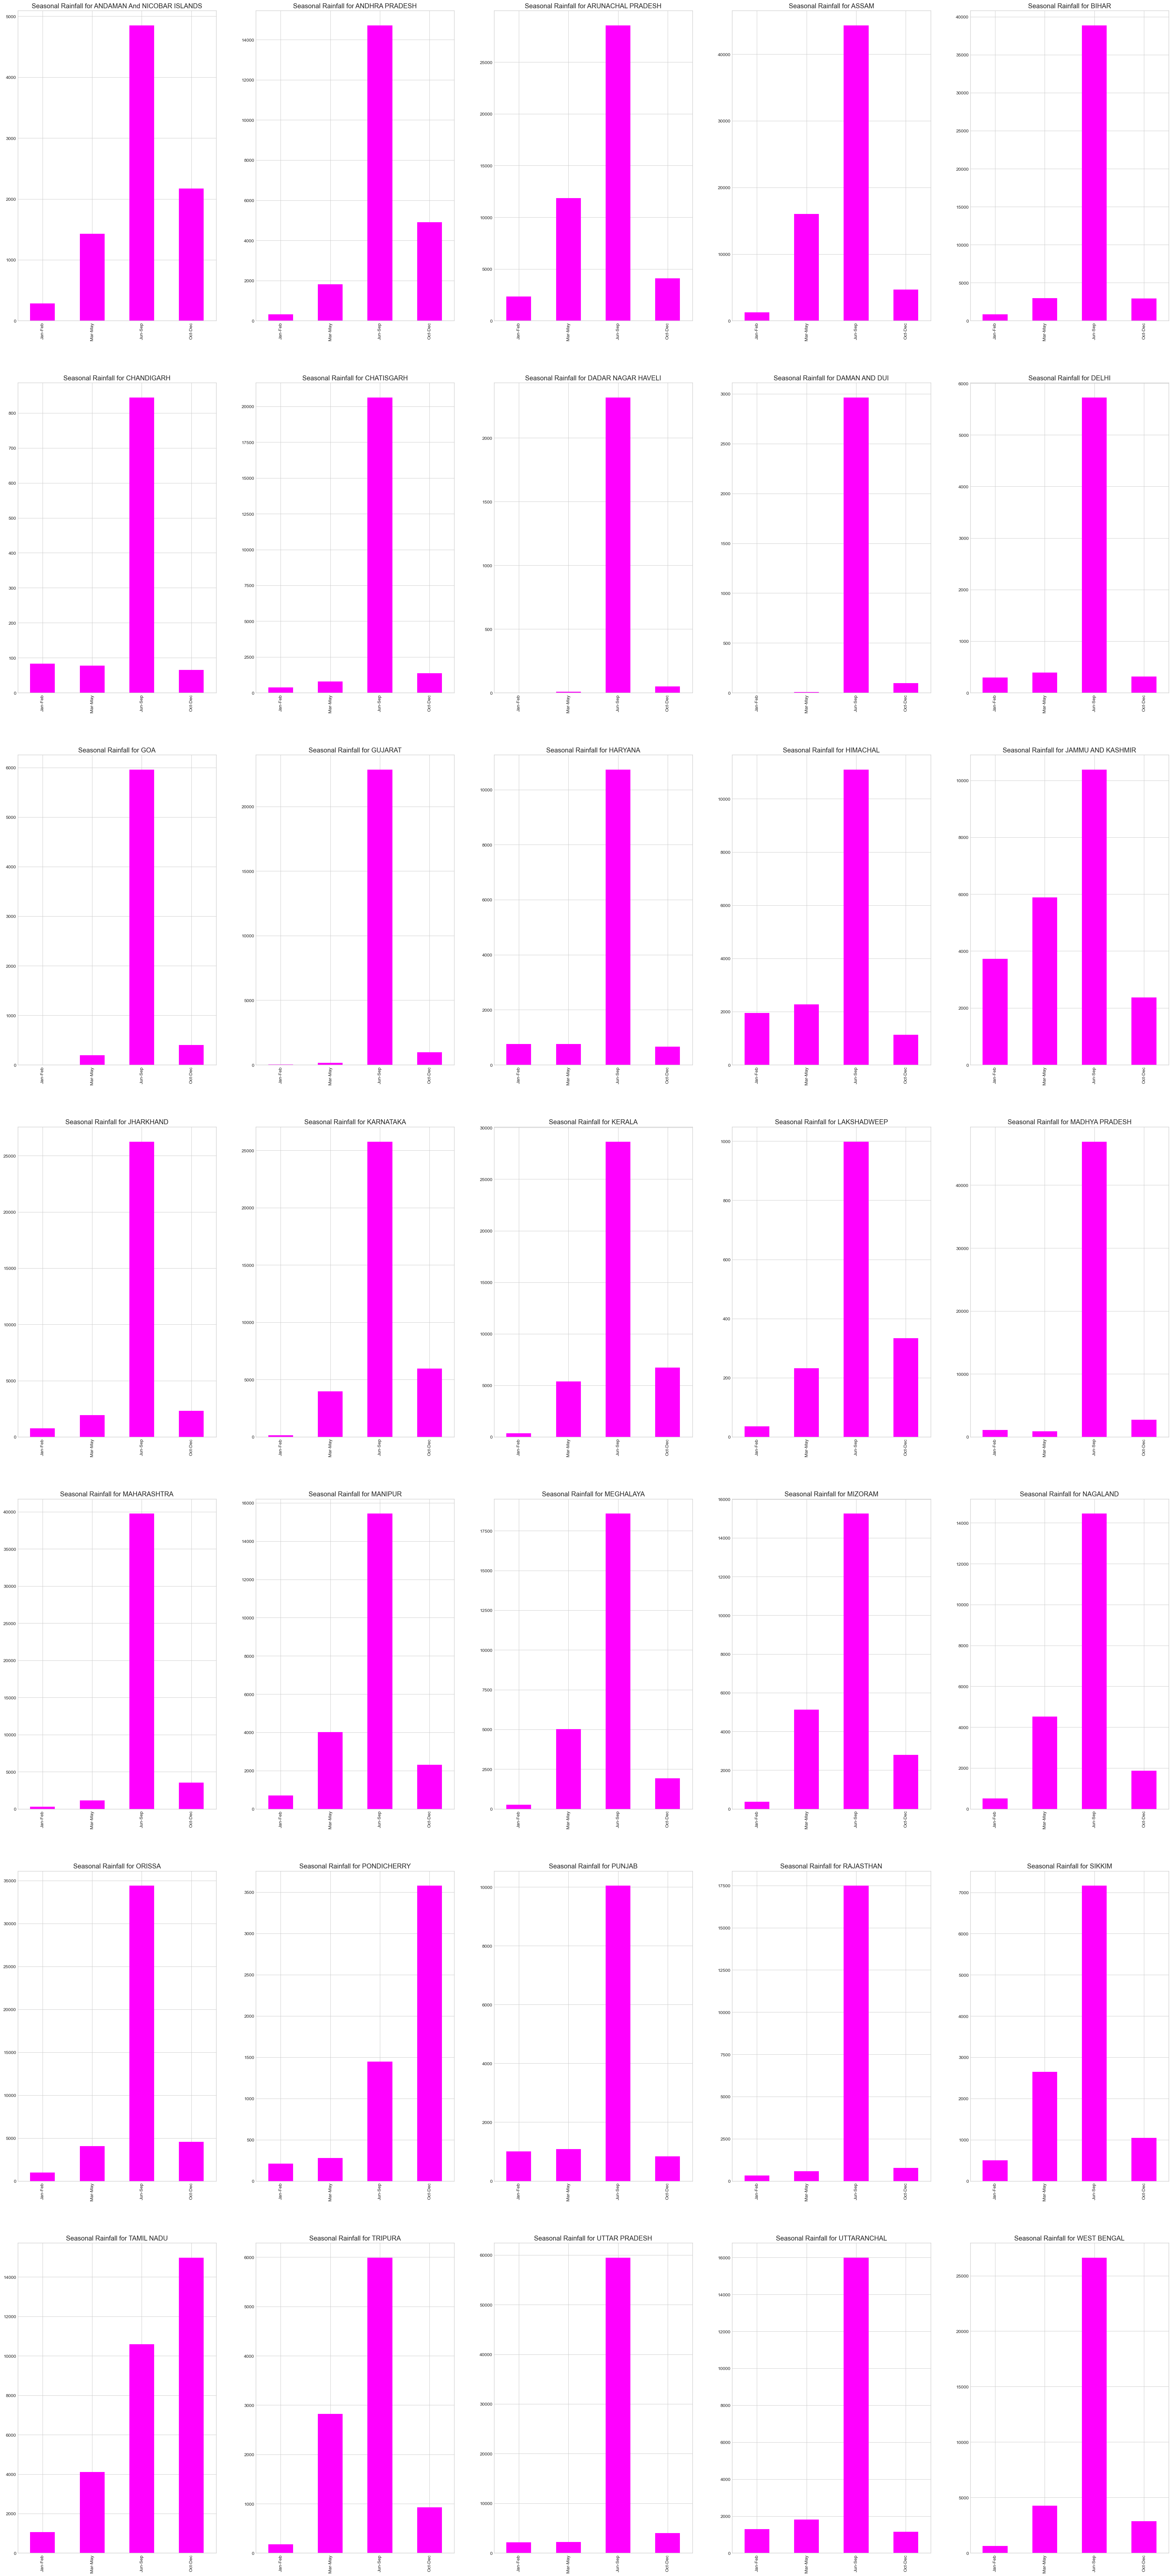

<Figure size 640x480 with 0 Axes>

In [21]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(45,100))

for i in range(35):
    plt.subplot(7, 5, i+1)
    t = seasonal_total_rainfall[seasonal_total_rainfall.columns[i]].plot.bar(color='magenta')
    t.set_title("Seasonal Rainfall for " +str(seasonal_total_rainfall.columns[i]))
plt.show()
plt.savefig("seasonal_trend.png")